# Support Vector Machines Project 

## The Data
For this series of lectures, we will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types:

<img src= 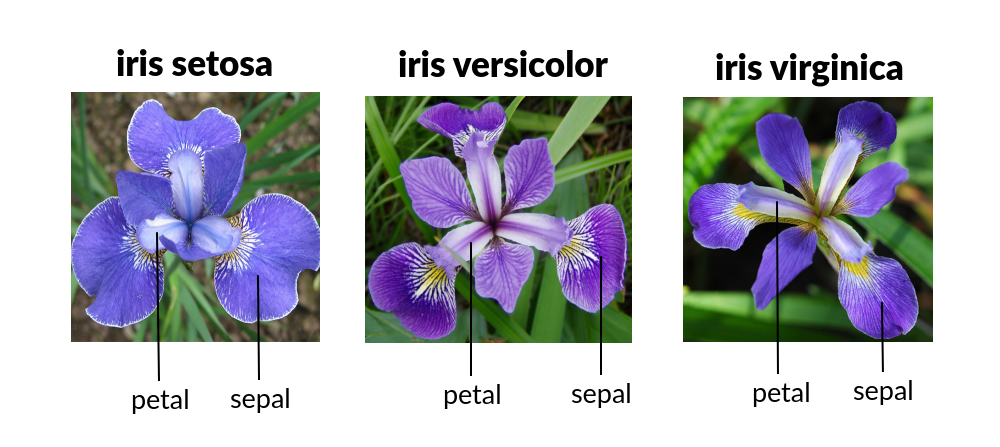>

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [2]:
sns.set_style('darkgrid')

## Get the data

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## Exploratory Data Analysis

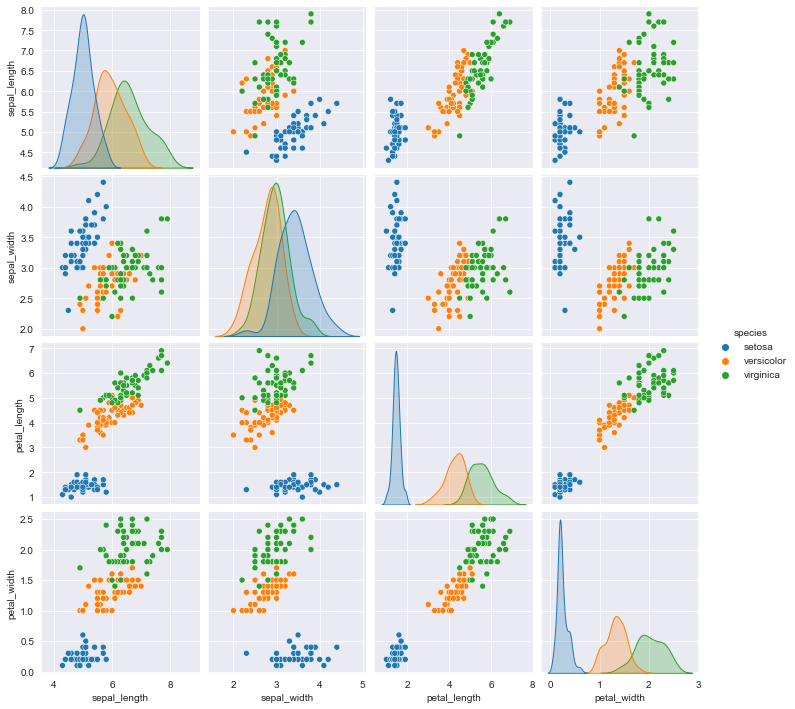

In [5]:
sns.pairplot(iris, hue = 'species')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

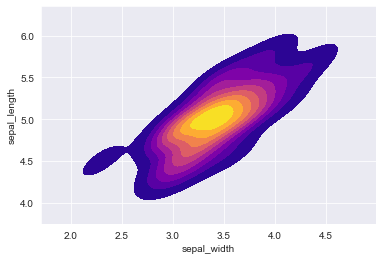

In [6]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(x = setosa['sepal_width'], y = setosa['sepal_length'], cmap = 'plasma', shade = True)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

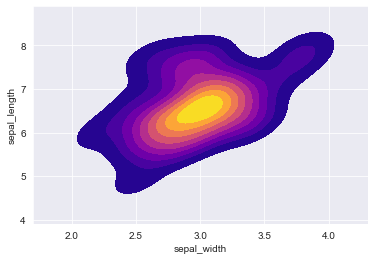

In [7]:
virginica = iris[iris['species']=='virginica']
sns.kdeplot(x = virginica['sepal_width'], y = virginica['sepal_length'], cmap = 'plasma', shade = True)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

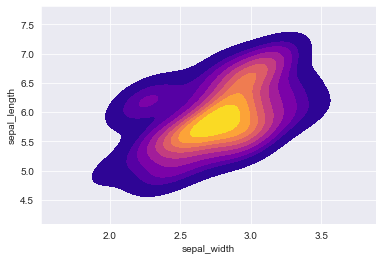

In [8]:
versicolor = iris[iris['species']=='versicolor']
sns.kdeplot(x = versicolor['sepal_width'], y = versicolor['sepal_length'], cmap = 'plasma', shade = True)

It looks like the versicolor species, has the narrowest sepal, this because the majority of its data is concentrated around the 2.5 or 3 centimeters. But the shortest sepal is property of the setosa species. 

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

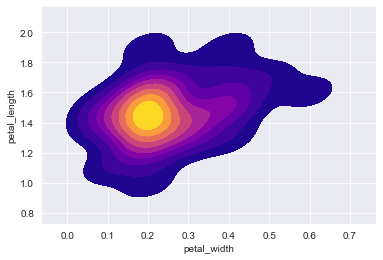

In [26]:
sns.kdeplot(x = setosa['petal_width'], y = setosa['petal_length'], cmap = 'plasma', shade = True)

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

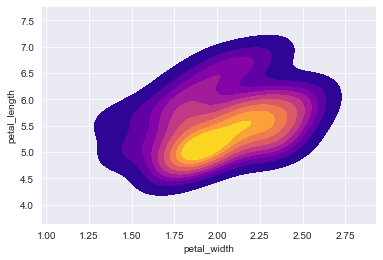

In [30]:
sns.kdeplot(x = virginica['petal_width'], y = virginica['petal_length'], cmap = 'plasma', shade = True)

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

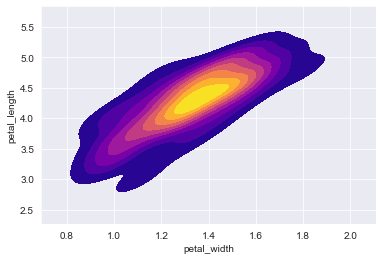

In [31]:
sns.kdeplot(x = versicolor['petal_width'], y = versicolor['petal_length'], cmap = 'plasma', shade = True)

The behaviour is a little different here, the petal of the setosa species is more concentrated in one point and is a lot narrower and shortest than the other two species, the virginica species varies but it looks like it's the biggest one.

<img src= 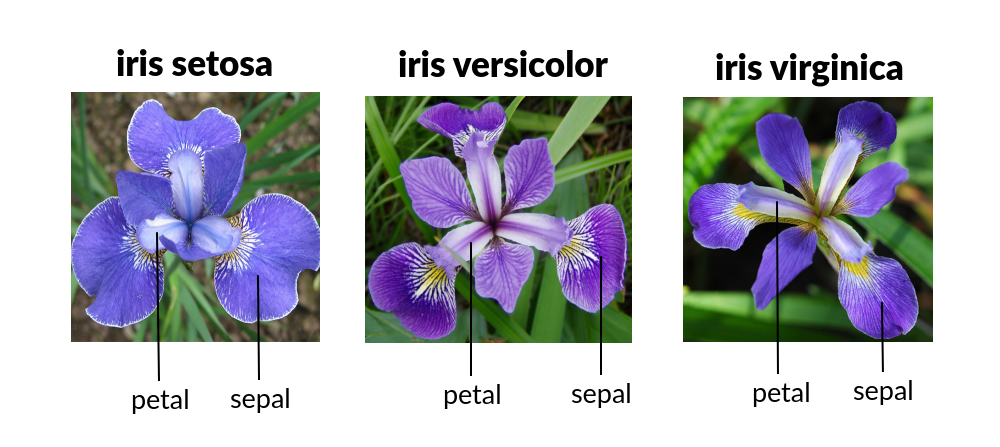>

# Train Test Split


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = iris.drop('species', axis = 1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Train a Model

In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC()

In [14]:
svc.fit(X_train,y_train)

SVC()

## Model Evaluation

In [15]:
predictions = svc.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



It would be really hard to improve this model, it has only 150 observations, but let's see how would the Gridsearch can change the results.

## Gridsearch Practice

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'C':[0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [21]:
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose = 2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [22]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [23]:
predictions = grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Like I said before, it was really hard to improve this model, this could be due a noisy point that is to hard to grab, it would probably overfit our model if we tried.